<center><img src="images/header.png"></center>

<h1><center>Лекция №6: Введение в анализ социальных сетей</center></h1>
<hr>
<h1><center>Домашняя работа</center></h1>

Данное ДЗ является довольно творческим и оно требует довольно много самостоятельной работы, так что не стоит с ним мешкать =)

Вам предлагается выбрать сообщество (или сообщества) в сети ВКонтакте и проанализировать его (их) контингент. 


**Правила:**
* Отчеты принимаются до **23:59 11 ноября**. Вы должны залить ваш ноутбук в github дать на него ссылку в следующей [форме](https://forms.gle/88d9CfaJN5gPV4bB8).
* Работоспособность будет проверяться через [colab](https://colab.research.google.com) (можете сразу давать ссылку на него). Если ноутбук не будет исполняться (падать по ошибке) то все, что будет написано после ошибки не будет учитываться при формировании оценки 
* Вы должны включить код, с помощью которого вы общались с API вконтакте, но для экономии времени, заранее предусмотреть возможность загрузки уже собранных данных (например, как это было реализовано в ноутбуках по кластеризации через `wget` и dropbox или raw данными в github)

**Пожелания:**
* Выбирайте для анализа небольшие сообщества (до 5к), желательно чтобы вы сами в них состояли - это ускорит вычисления и упростит интерпретацию
* Отнеситесь к этой работе как к исследованию - больше графиков и комментариев!
* Красивые визуализации лучше делать через gephi!

# Загрузка данных (2 балла)

Изучите следующие материалы
* [Знакомство с API](https://vk.com/dev/first_guide)
* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI
* Про метод execute - [туть](https://vk.com/dev/execute) и [туть](http://www.cyberforum.ru/python-web/thread1730446.html)

Выберите сообщество и загрузите
* Идентификаторы всех [участников сообщества](https://vk.com/dev/groups.getMembers)
* [Списки друзей](https://vk.com/dev/friends.get) участников и их признаки (пол, возраст, университет и все, что посчитаете нужным - нам потом группировать по этим атрибутам)
* [Пересечение](https://vk.com/dev/friends.getMutual) между списками друзей

Таким образом вы должны получить замкнутую группу аккаунтов с их друзьями и связями между ними.

Далее - соберите их этого граф в networkX и сохраните в graphml или gml формате

**Замечания:**
* Вконтакте может ограничить вам скорость запросов, поэтому иногда имеет смысл ставить небольшую паузу (`time.sleep(1)`) между запросами и сохранять предварительные результаты
* Код выгрузки может быть написан как с помощью модуля `vk` так и просто с помощью requests 


In [13]:
#!pip install vk
''''import vk
import time
token = '7c43fd0daa2073373bcabb3bffee74109936773e019ea66139b1695ec007c8ddfa1c15f4df39e60546742'
session = vk.Session(access_token = token)
api = vk.API(session) 
group = 'enkybrain'
members = api.groups.getMembers(group_id = group,  v = 5.73)['items']
members_not_privat = []
list_of_friends = []
edges = {}
nodes = {}
nodes_friends_only = []
for i in members:
    time.sleep(1)
    try : 
        friend_of_member = api.friends.get(user_id = i,v = 5.73)['items']
        member  = api.users.get(user_id = i,  fields= ['first_name', 'last_name',  'career', 'is_closed', 
                                                       'sex', 'city', 'country', 'bdate', 'relation', 'education', 
                                                       'followers_count'], v = 5.89)    
        dict_of_member= {}
        for j in ['sex', 'relation', 'followers_count', 'university', 'faculty', 'graduation', 'first_name', 'last_name']:
            try:   dict_of_member[j] = member[0][j]
            except Exception: continue
        for j in ['city', 'country']:
            try:   dict_of_member[j] = member[0][j]['id']
            except Exception: continue
        
        try: dict_of_member['company'] = member[0]['career'][0]['company']
        except Exception: pass    
        try: 
             if len(member[0]['bdate'].split('.')[-1]) == 4: dict_of_member['age'] = 2019 - int(member[0]['bdate'].split('.')[-1])     
        except Exception: pass
        
        nodes[int(i)] = dict_of_member #member[0]
        members_not_privat.append(i)
        list_of_friends.append(friend_of_member)

    except Exception: 
        continue

set_of_friends = set()
for listt in list_of_friends:
    for i in listt:
        set_of_friends.add(i)
set_of_friends = list(set_of_friends)

i = 0
while i < len(set_of_friends):
    time.sleep(1)
    member  = api.users.get(user_ids = [j for j in set_of_friends[i:min(i+500,len(set_of_friends))]] ,
                            fields= ['first_name', 'last_name',  'career', 'is_closed', 'sex', 'city', 'country', 
                                     'bdate', 'relation', 'education', 'followers_count'], v = 5.89)   
    i += 500                                     
    for j, val in enumerate(member):
        try:
            if val['is_closed'] == False:
                dict_of_member = {}
                for j in ['sex', 'relation', 'followers_count', 'university', 'faculty', 'graduation', 
                          'first_name', 'last_name']:
                    try:   dict_of_member[j] = val[j]
                    except Exception: continue
                for j in ['city', 'country']:
                    try:   dict_of_member[j] = val[j]['id']
                    except Exception: continue
                try: dict_of_member['company'] = val['career'][0]['company']
                except Exception: pass        
                try: 
                    if len(val['bdate'].split('.')[-1]) == 4: dict_of_member['age'] = 2019 - int(val['bdate'].split('.')[-1])     
                except Exception: pass
                nodes[int(val['id'])] = dict_of_member#val
                nodes_friends_only.append(int(val['id']))
        except Exception: continue

            
            
for i in members_not_privat:
    edges[int(i)] = []   
for i, member in enumerate(members_not_privat):
    for j in list_of_friends[i]:
        if j in nodes: edges[member].append(j)
nodes_friends_only = list(set(nodes_friends_only) - set(members))
for i in nodes_friends_only:
    edges[int(i)] = []    
for member in members_not_privat:
    i = 0
    while i < len(nodes_friends_only):
        time.sleep(1)
        inters = api.friends.getMutual(source_uid = member, target_uids =  [j for j in nodes_friends_only[i:min(i+100,len(nodes_friends_only))]], v=5.89)
        i += 100
        for j in inters:
            common_new = [k for k in j['common_friends'] if k in nodes]
            edges[int(j['id'])] =  list(set(edges[int(j['id'])] + common_new))''''

    
### Здесь должен быть код загрузки из VK
### Его можно закомментировать

In [14]:
''''import networkx as nx
g = nx.Graph()

g.add_nodes_from((fid, {'first_name': node.get('first_name', '-1'), 
                        'last_name': node.get('last_name', '-1'), 
                        'sex': node.get('sex', -1), 
                        'age': node.get('age', -1),
                        'relation': node.get('relation', -1),
                        'followers_count': node.get('followers_count', -1),
                        'university': node.get('university', -1),
                        'faculty': node.get('faculty', -1),
                        'graduation': node.get('graduation', -1),
                        'city': node.get('city', -1),
                        'country': node.get('country', -1),
                        'company': node.get('company', '-1')
                       }) for fid, node in nodes.items())
g.add_edges_from((f1, f2) for f1, f_list in edges.items() for f2 in f_list)
nx.write_graphml(g, 'vk_graph_my_to_send.graphml')''''
### Здесь должен быть код преобразования в граф и сохранение в файл
### Его тоже можно закомментировать

In [116]:
import networkx as nx
g = nx.read_graphml('vk_graph_my_to_send.graphml')
### Здесь код, который загружает сохраненную сеть

# Визуализация (1 балл)

* Откройте полученный граф в gephi
* Выберите наиболее удачный на ваш взгляд алгоритм прорисовки
* Добавьте изменение размера вершины в зависимости от степени вершины
* Вставьте скрин-шот ниже

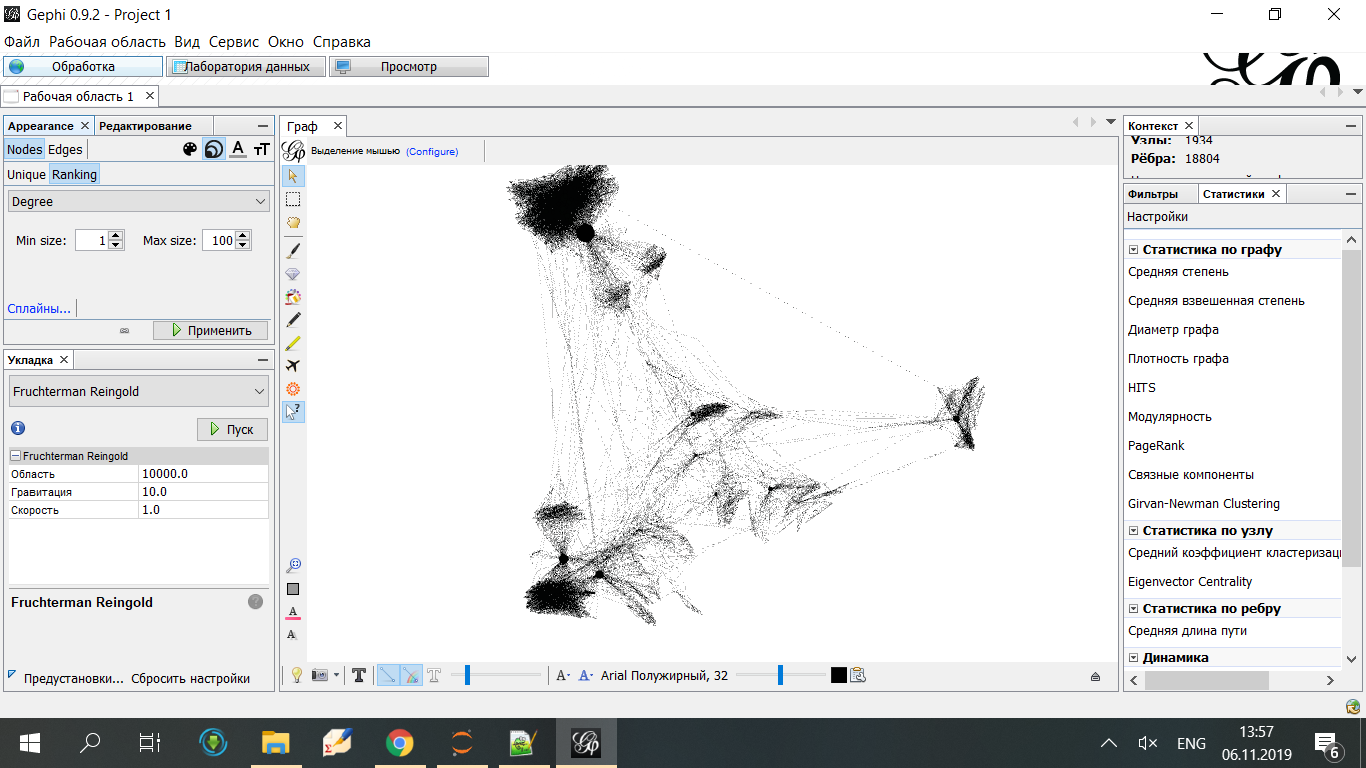

Картинка выше  -  размер вершины в зависимости от степени вершины. Картинка ниже - добавила цвет в зависимости от степени вершины.

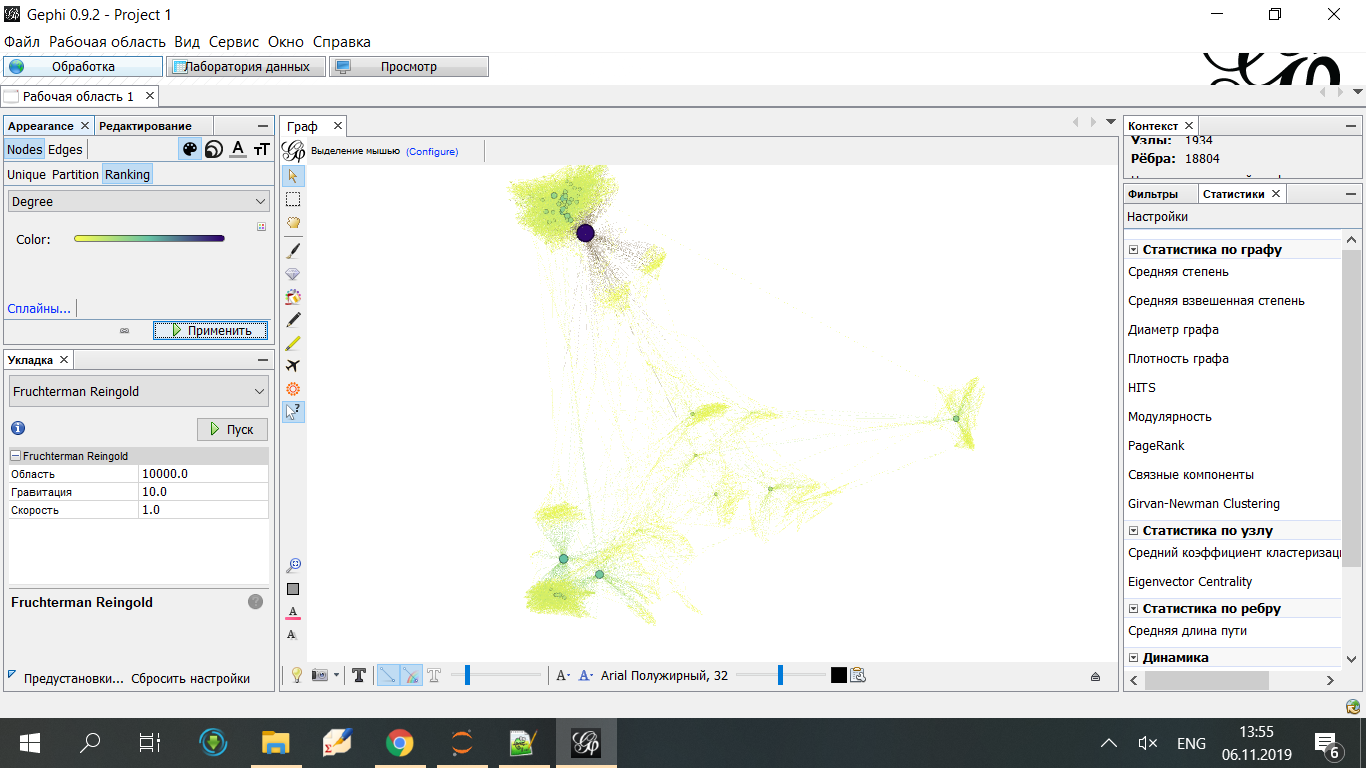
### Ваши картинки и комментарии ниже

# Центральности вершин (1.5 балла)

Возможно, перед тем как пойти дальше, стоит немного почитстить граф - с помощью [kcore](https://www.google.com/search?client=firefox-b-d&q=networkx+kcore)

* Найдите наиболее влиятельные вершины с точки зрения degree, closeness и betweenness centrality
* Выделите их на картинке в gephi

In [117]:
betw = nx.betweenness_centrality(g)
close = nx.closeness_centrality(g)
degr = nx.degree_centrality(g)
nx.set_node_attributes(g, close, 'close_cent')
nx.set_node_attributes(g, betw, 'betw_cent')
nx.set_node_attributes(g, degr, 'degr_cent')
nx.write_graphml(g, 'vk_graph_my.graphml')
print('наиболее влиятельные вершины с точки зрения degree: ', sorted(degr.items(), key=lambda x:x[1], reverse=True)[0:5])
print('наиболее влиятельные вершины с точки зрения closeness: ', sorted(close.items(), key=lambda x:x[1], reverse=True)[0:5])
print('наиболее влиятельные вершины с точки зрения  betweenness: ', sorted(betw.items(), key=lambda x:x[1], reverse=True)[0:5])


наиболее влиятельные вершины с точки зрения degree:  [('43676633', 0.3045501551189245), ('151805540', 0.15408479834539815), ('12484480', 0.14012409513960705), ('22511121', 0.12150982419855223), ('7804837', 0.10961737331954499)]
наиболее влиятельные вершины с точки зрения closeness:  [('10137268', 0.4614650441422095), ('43676633', 0.40274885464389837), ('206897817', 0.37966234786022773), ('86531056', 0.37936445664966656), ('198598465', 0.3790670325362603)]
наиболее влиятельные вершины с точки зрения  betweenness:  [('10137268', 0.4762841539776595), ('43676633', 0.3975616414051527), ('73466085', 0.16505542928697395), ('12484480', 0.16374278476982917), ('3152287', 0.12393087185306724)]


Наиболее влиятельная вершина с точки зрения degree -- Егор Плотников. Чувак, который всех добавляет вк без разбора.
А по closeness и betweenness  -- Екатерина Федосеева. Основательница данной группы вк.

Картинка для betweeness:

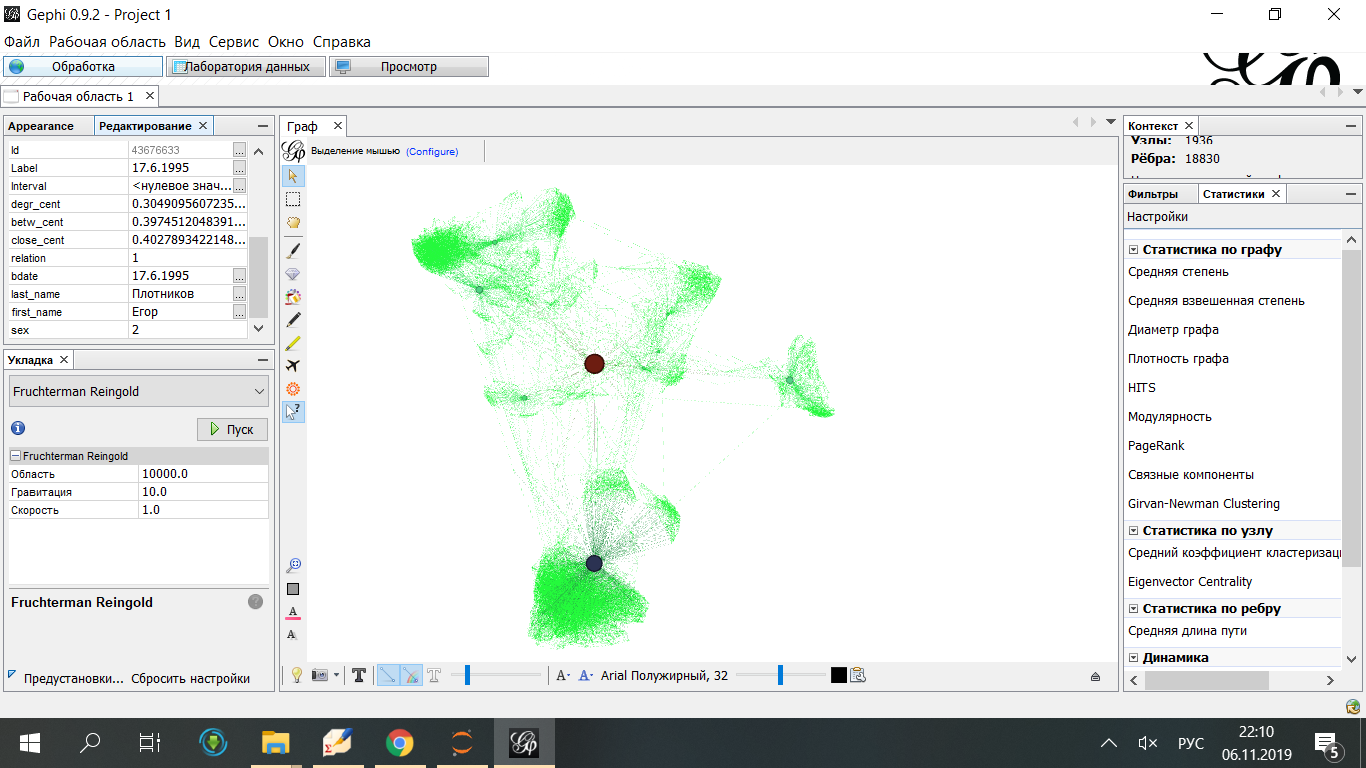

Для closeness аналогичная картинка. Самая жирная точка, но почему-то закрытая другими поверх -- основательница сообщества.
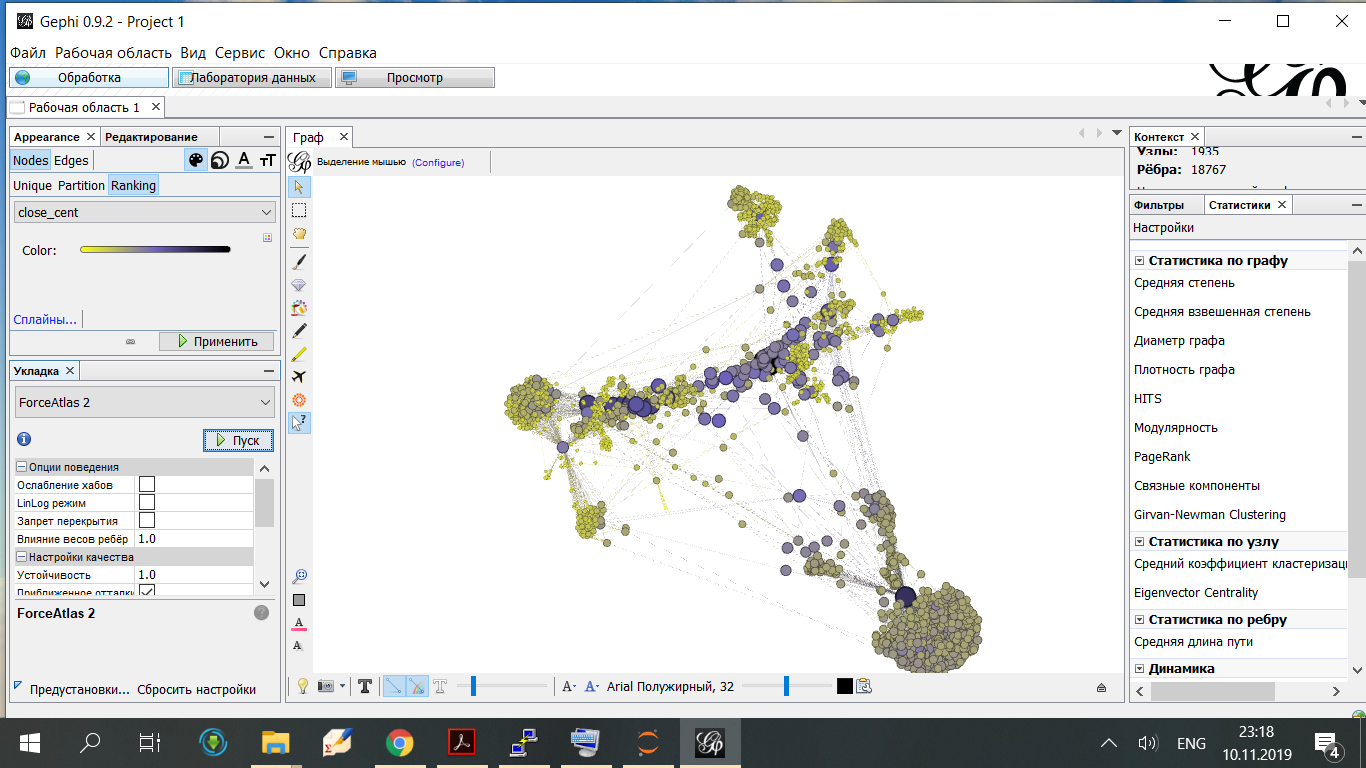

Картинка для degree. Самая жирная точка -- тот самый Егор Плотников. Он даже меня добавил, хотя я с ним не общалась. Теперб он подписан))
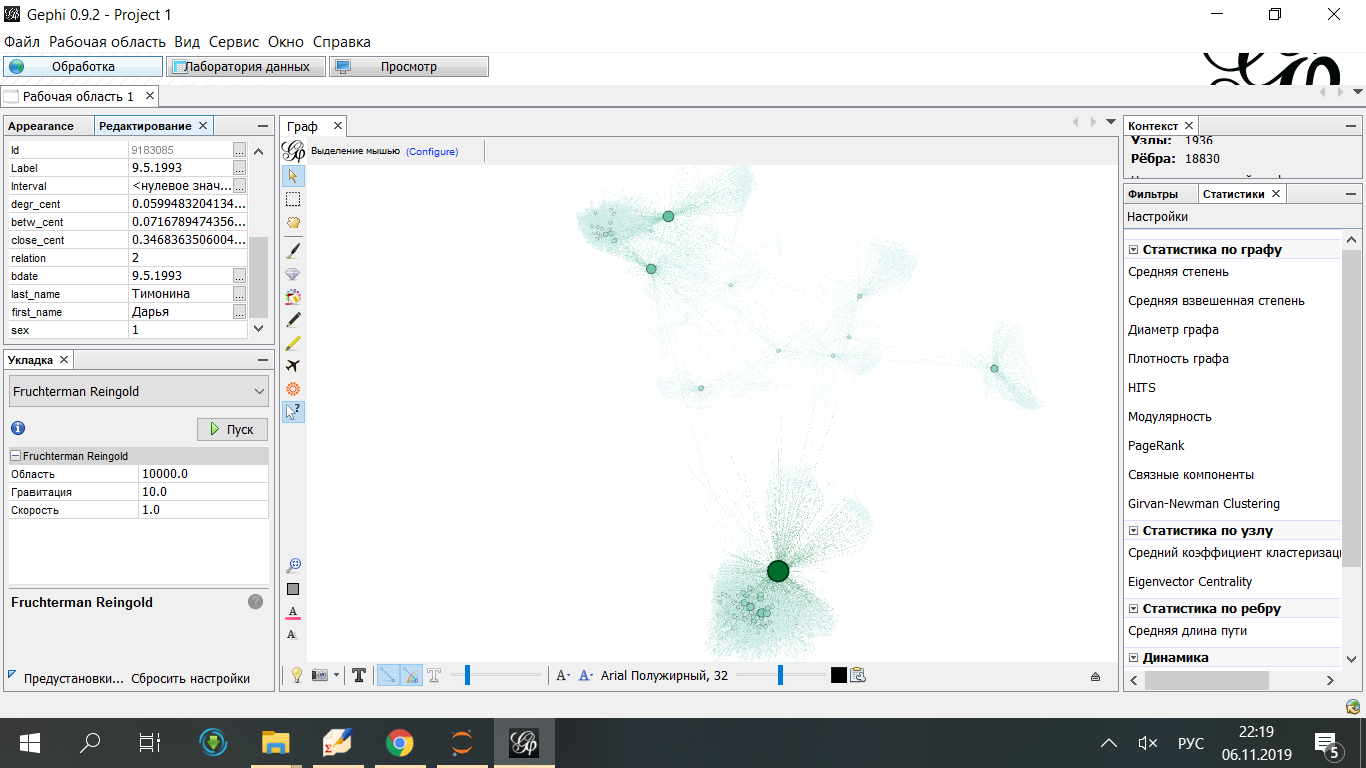

# Сообщества... в сообществе (1.5 балла)

Выберите алгоритм выделения сообществ на графах и алгоритм на основе похожести вершин. Для обоих вариантов
* Выделите сообщества, опираясь на максимальное значение модулярности для полученного разбиения
* Изобразите граф с вершинами, раскрашенными в цвет своего сообщества в gephi
* Попробуйте проинтерпретировать полученные сообщества, кто эти люди, почему они всязаны?
* Какой метод на ваш взгляд сработал лучше?

In [118]:
G = nx.k_core(g,k = 12) #чистим граф
nx.write_graphml(G, 'vk_graph_my_cleaned.graphml')

Найдем сообщества первым способом

In [119]:
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm
print('start')
eb_partitions = nx.community.girvan_newman(G)
print('finish')
k = 0
mod_max = 0
for partition in eb_partitions:
    print('iter ', k)
    k+=1
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(G, partition)
        if(mod>mod_max):
            mod_max = mod
            best_part = partition
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break


start
finish
iter  0
For 2 communities modularity = 0.47304724811052673
iter  1
For 3 communities modularity = 0.4993369640748043
iter  2
For 4 communities modularity = 0.5212472140320745
iter  3
For 5 communities modularity = 0.5451491212282238
iter  4
For 6 communities modularity = 0.5654519670366502
iter  5
For 7 communities modularity = 0.5650850819893443
iter  6
For 8 communities modularity = 0.5646871449868509
iter  7
For 9 communities modularity = 0.564288729783116
iter  8


In [120]:
dict_clust_g_n = {}
for i, val in enumerate(best_part):
    for j in val:
        dict_clust_g_n[j] = i
G_for_n_g = G.copy()
nx.set_node_attributes(G_for_n_g, dict_clust_g_n, 'cluster_gir_new')
nx.write_graphml(G_for_n_g, 'vk_graph_my_gn.graphml')

Сообщества в графе:
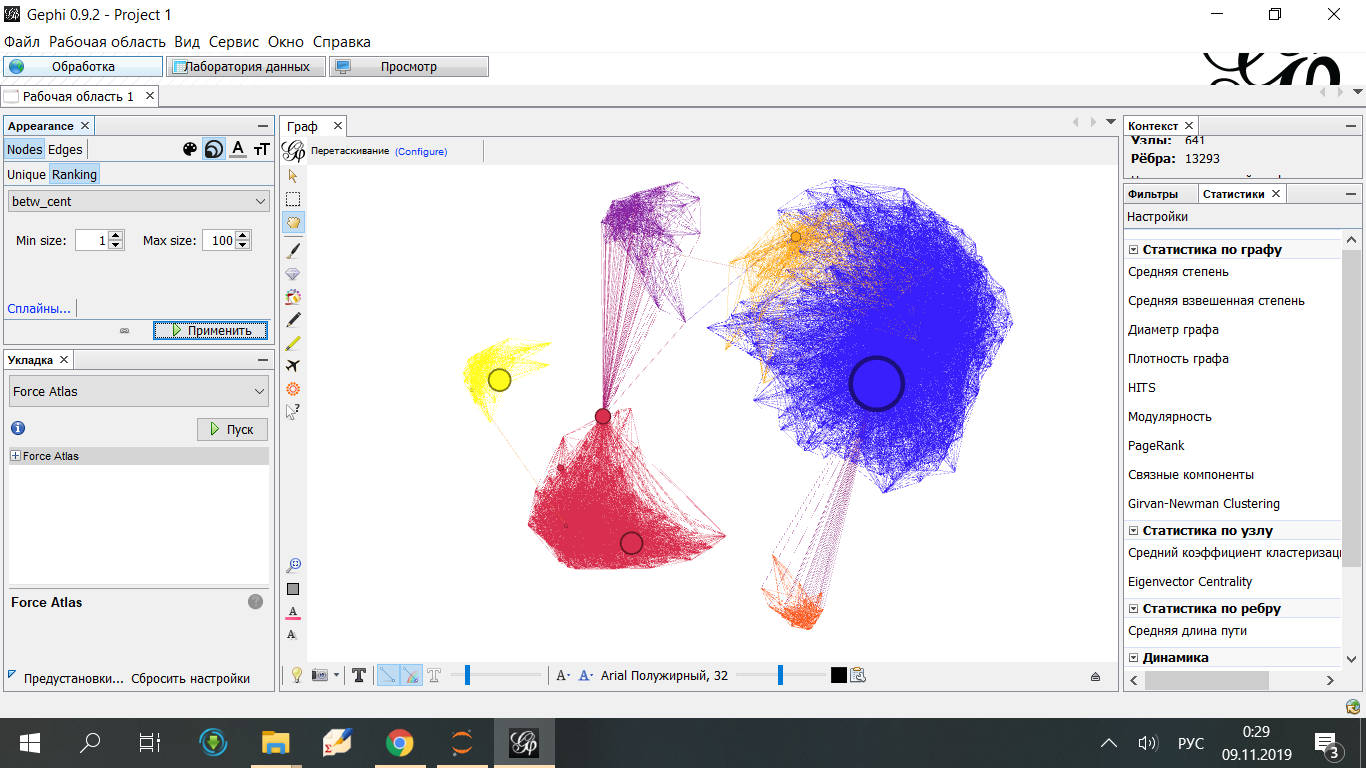
Сообщества соответствуют:
1) Людям из МГУ (светло-рыжий)
2) Людям, которых объединяет работа в Увертюре, их родственники и друзья. Увертюра -- организация, где раньше работала основательница Сообщества (малиновый)
3) Красно-рыжий (нижний кластер) -- похоже, тусовка из Бауманки. Часть людей оттуда
4) Центр синего сообщетсва -- тот чувак, который добавляет всех. Видимо, какое-то его окружение
Деление выглядит разумным.

Label propogation:

In [121]:
G_for_lab_p = G.copy()
print('start')
eb_partitions = nx.community.asyn_lpa_communities(G_for_lab_p)
print('finish')
best_part = list(eb_partitions)
dict_clust_l_p = {}
for i, val in enumerate(best_part):
    for j in val:
        dict_clust_l_p[j] = i
nx.set_node_attributes(G_for_lab_p, dict_clust_l_p, 'cluster_lab_prop')
nx.write_graphml(G_for_lab_p, 'vk_graph_my_lab_prop.graphml')

start
finish


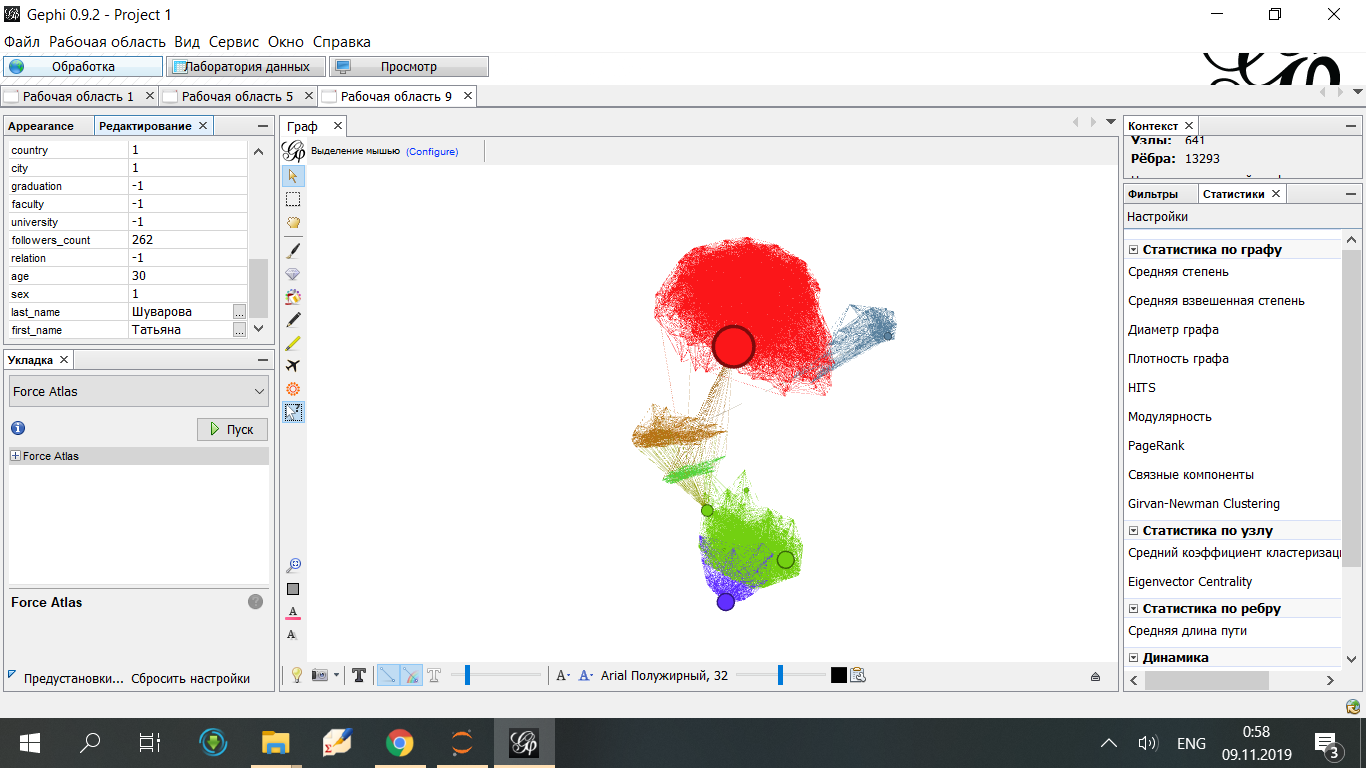
Получилось что-то очень похожее

Выявление сообществ с помощью спектральной кластеризации а матрице схожести вершин

In [122]:
import numpy as np
from scipy.sparse import coo_matrix

G_for_jac = G.copy()
for node in G_for_jac:
    del G_for_jac.node[node]['first_name']
for node in G_for_jac:
    del G_for_jac.node[node]['last_name']
for node in G_for_jac:
    del G_for_jac.node[node]['close_cent']
for node in G_for_jac:
    del G_for_jac.node[node]['betw_cent']
for node in G_for_jac:
    del G_for_jac.node[node]['degr_cent']

jac = nx.jaccard_coefficient(G_for_jac)
jac = np.array(list(jac))

In [123]:
dict_nodes_to_int ={}
for i ,node in enumerate(G_for_jac):
    dict_nodes_to_int[node] = float(i)
for i in range(len(jac[:,0])):
    jac[i,0] = dict_nodes_to_int[jac[i,0]]  
for i in range(len(jac[:,1])):
    jac[i,1] = dict_nodes_to_int[jac[i,1]]  


In [124]:
jac = jac.astype(np.float)
num_of_nod = G_for_jac.number_of_nodes()
D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(num_of_nod,num_of_nod))

D = D+D.T

In [125]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [126]:
from sklearn.cluster import SpectralClustering
mod_max = 0
for i in range(2,10):
    print(i)
    model = SpectralClustering(n_clusters=i, affinity='precomputed')
    model.fit(D)
    labels = model.labels_
    partition =[set() for i in range(len(set(labels)))]
    for i, val in enumerate(labels):
        partition[val].add(get_key(dict_nodes_to_int, i))
    mod = modularity(G_for_jac, partition)
    if(mod > mod_max):
        mod_max = mod
        best_part = partition
    print('For {} communities modularity = {}'.format(i, mod))
    

2
For 640 communities modularity = 0.4515185489817981
3
For 640 communities modularity = 0.4745769205059961
4
For 640 communities modularity = 0.4910672064647247
5
For 640 communities modularity = 0.5198280231009444
6
For 640 communities modularity = 0.5086090993977022
7
For 640 communities modularity = 0.17887147721383842
8
For 640 communities modularity = 0.1758129275384473
9
For 640 communities modularity = 0.1871582944410046


In [127]:
dict_clust_jac = {}
for i, val in enumerate(best_part):
    for j in val:
        dict_clust_jac[j] = i
G_for_jac = G.copy()
nx.set_node_attributes(G_for_jac, dict_clust_jac, 'cluster_jac')
nx.write_graphml(G_for_jac, 'vk_graph_my_jac.graphml')

Результаты на картинке:
 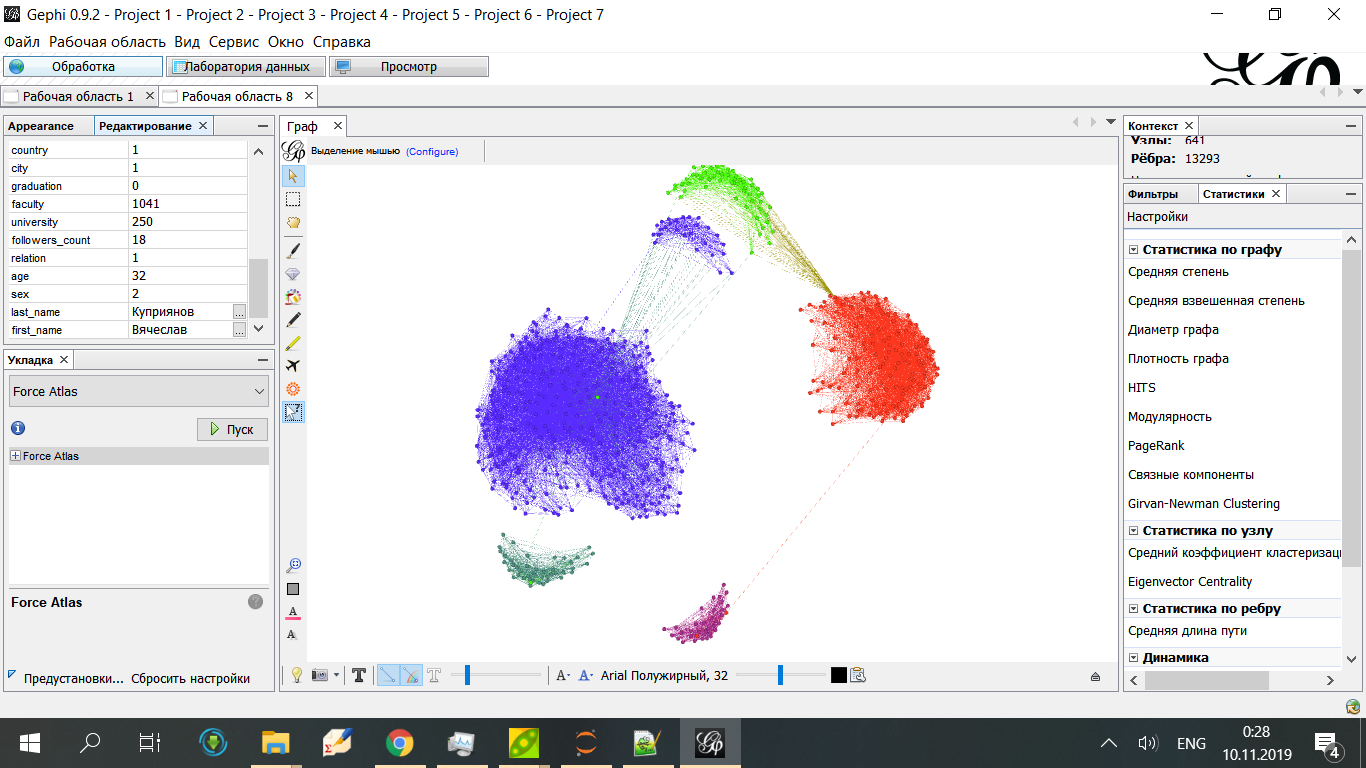

Получилась очень похожая картинка с предыдущими. Незанчительно количество точек попало в другие кластеры. Еще дно отличие -- синий кластер на последний картинке теперь единый. То есть тусовка из Бауманки не выделена. Что хуже. Возможно, стоило взять не 5 кластеров для этой кластеризации (по модулярности), а шесть.
Моя точка, кстати, тоже оказалась не в мехматовской тусовке(

# Асортативность по признакам (1.5 балла)

* Посчитайте коэффициенты асортативности для признаков вершин (пол, возраст, университет, школа, город, количество друзей, etc)
* Проинтерпретируйте полученные результаты

In [128]:
attributes = G.node["9183085"]
attributes = G.node["9183085"].keys()
for attr in attributes:
    print('{} assortativity = {}'.format(attr, 
                                         nx.assortativity.attribute_assortativity_coefficient(g, attr)))
### Ваш код, картинки и комментарии ниже

first_name assortativity = 0.0013155739024081994
last_name assortativity = 0.0009239108656155832
sex assortativity = 0.10509473525846433
age assortativity = 0.029880953316746943
relation assortativity = 0.037130003734715124
followers_count assortativity = -0.0008910934459765669
university assortativity = 0.08243303374346923
faculty assortativity = 0.06902360000384132
graduation assortativity = 0.052404194411387744
city assortativity = 0.33522519668948364
country assortativity = 0.00024793519679422937
company assortativity = 0.019296756822095903
close_cent assortativity = 0.008452621497428526
betw_cent assortativity = 0.0015307769081702519
degr_cent assortativity = 0.011347885591205564


Самая высокая ассортативность -- город, пол, факультет и год выпуска университета, что логично.Ведь больше всего друзей мы заводим в нашем городе, нашего пола, возможно выпускников нашего же факультета в вузе. Думаю, это не особенность данного графа, а общая тенденция.  Можно ожидать, что высокая ассортативность может быть у признака 'company', то есть название компании, в которой человек работает (это предположение можно сделать согласно выбранному сообществу), но это не так, так как люди указывают компанию, в которой работают, редко (если это не какой-нибудь Мейл и Яндекс, а таких людей в этом сообществе нет). К тому же у компании нет id, а есть только название, которое может варьироваться.